In [1]:
import numpy as np
np.random.seed(42)

In [2]:
def y(x):
    return 3*np.exp(0.5*x)

n = 500
x = np.linspace(0.1, 10, n)
#x = np.random.uniform(low = 3, high = 20, size = n)
z = y(x)
# нормальный шум (сохраняем в отдельную переменную)
sigma = 0.1*z
e = np.random.normal(0, sigma)
z_noized_normal = z+e

# другой вариант шума (лог-обычный) будет сохранён отдельно ниже


In [3]:
# Линеаризация и МНК для нормального шума
lin_z = np.log(z_noized_normal)

def regressor(x):
   return np.array((1, x))

X  = []
for xi in x:
   X.append(regressor(xi))
X = np.array(X)

lin_Theta = np.linalg.inv(X.T@X)@X.T@lin_z
lin_Theta

array([1.09122893, 0.50064383])

In [4]:
Theta_normal = np.array([np.exp(lin_Theta[0]), lin_Theta[1]])
Theta_normal

array([2.9779315 , 0.50064383])

In [5]:
from scipy.optimize import curve_fit

def model_func(x, a, b):
    return a * np.exp(b * x)

# Нелинейная подгонка для нормального шума
popt_normal, pcov_normal = curve_fit(model_func, x, z_noized_normal, p0=(1, 0.1), maxfev = 1000000)
popt_normal

array([3.13141155, 0.4947136 ])

In [6]:
import matplotlib.pyplot as plt
# создаём логнормальный шум и сохраняем отдельно
e_log = np.random.lognormal(mean=0, sigma=1.25, size=n)   
z_noized_lognormal = z + e_log


In [7]:
# Линеаризация и МНК для лог-нормального шума
lin_z = np.log(z_noized_lognormal)

def regressor(x):
   return np.array((1, x))

X  = []
for xi in x:
   X.append(regressor(xi))
X = np.array(X)

lin_Theta = np.linalg.inv(X.T@X)@X.T@lin_z
lin_Theta

array([1.34442812, 0.4701052 ])

In [8]:
Theta_lognormal = np.array([np.exp(lin_Theta[0]), lin_Theta[1]])
Theta_lognormal

array([3.8359922, 0.4701052])

In [9]:
# Нелинейная подгонка для лог-нормального шума
popt_lognormal, pcov_lognormal = curve_fit(model_func, x, z_noized_lognormal, maxfev = 10000000)
popt_lognormal

array([3.3233011 , 0.48970837])

# Визуализация результатов
В следующих графиках показаны: исходная функция, два набора зашумлённых данных (нормальный и лог-нормальный),
а также кривые, полученные нелинейной подгонкой и линейной линеаризацией (МНК on log).


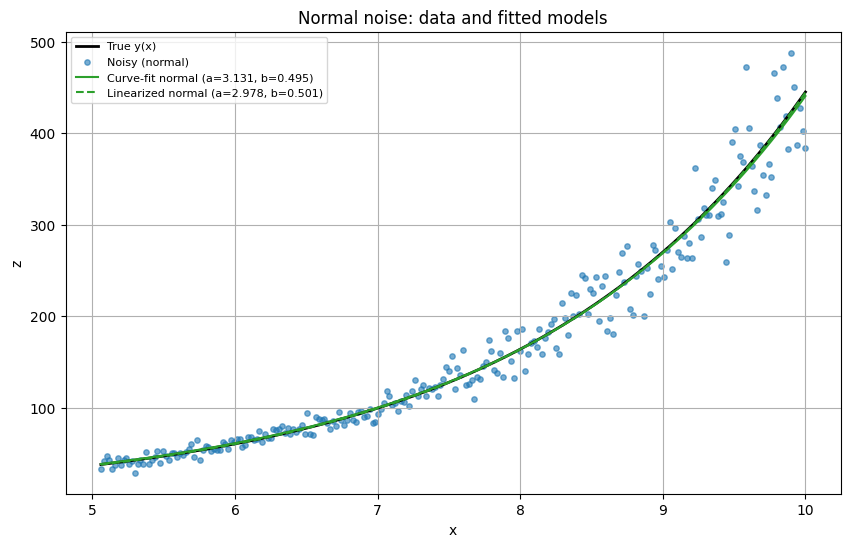

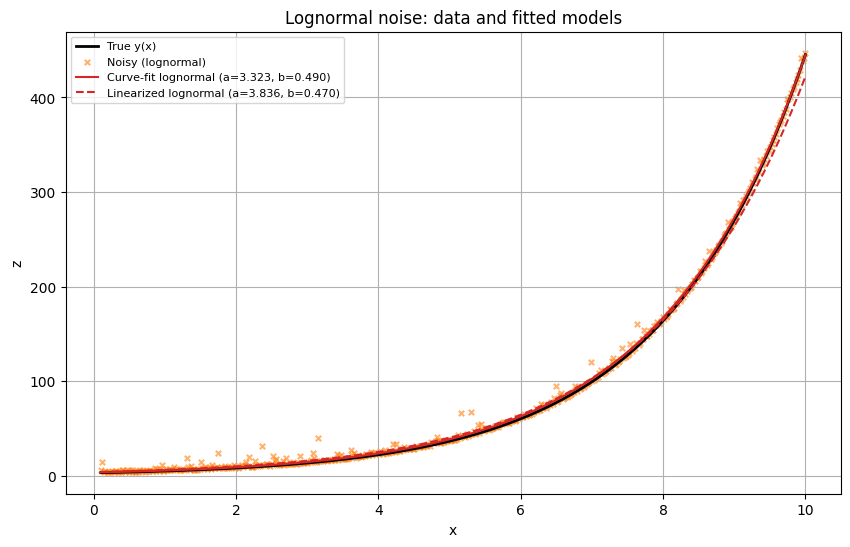

In [ ]:
# Построим отдельный график для нормального шума
plt.figure(figsize=(10,6))
plt.plot(x, z, label='True y(x)', color='black', linewidth=2)
plt.scatter(x, z_noized_normal, s=15, alpha=0.6, label='Noisy (normal)', color='C0')
plt.plot(x, model_func(x, *popt_normal), label=f'Curve-fit normal (a={popt_normal[0]:.3f}, b={popt_normal[1]:.3f})', color='C2')
plt.plot(x, Theta_normal[0]*np.exp(Theta_normal[1]*x), '--', label=f'Linearized normal (a={Theta_normal[0]:.3f}, b={Theta_normal[1]:.3f})', color='C2')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Normal noise: data and fitted models')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()

# Отдельный график для лог-нормального шума
plt.figure(figsize=(10,6))
plt.plot(x, z, label='True y(x)', color='black', linewidth=2)
plt.scatter(x, z_noized_lognormal, s=15, alpha=0.6, label='Noisy (lognormal)', color='C1', marker='x')
plt.plot(x, model_func(x, *popt_lognormal), label=f'Curve-fit lognormal (a={popt_lognormal[0]:.3f}, b={popt_lognormal[1]:.3f})', color='C3')
plt.plot(x, Theta_lognormal[0]*np.exp(Theta_lognormal[1]*x), '--', label=f'Linearized lognormal (a={Theta_lognormal[0]:.3f}, b={Theta_lognormal[1]:.3f})', color='C3')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Lognormal noise: data and fitted models')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()


In [11]:
# Вычислим MSE (по отношению к зашумлённым данным и к истинной функции) для каждой модели
from sklearn.metrics import mean_squared_error

# предсказания для нормального шума
y_pred_curve_normal = model_func(x, *popt_normal)
y_pred_lin_normal = Theta_normal[0]*np.exp(Theta_normal[1]*x)

# предсказания для лог-нормального шума
y_pred_curve_lognormal = model_func(x, *popt_lognormal)
y_pred_lin_lognormal = Theta_lognormal[0]*np.exp(Theta_lognormal[1]*x)

# MSE относительно зашумлённых наблюдений
mse_curve_normal_vs_noisy = mean_squared_error(z_noized_normal, y_pred_curve_normal)
mse_lin_normal_vs_noisy = mean_squared_error(z_noized_normal, y_pred_lin_normal)
mse_curve_lognormal_vs_noisy = mean_squared_error(z_noized_lognormal, y_pred_curve_lognormal)
mse_lin_lognormal_vs_noisy = mean_squared_error(z_noized_lognormal, y_pred_lin_lognormal)

# MSE относительно истинной функции (без шума)
mse_curve_normal_vs_true = mean_squared_error(z, y_pred_curve_normal)
mse_lin_normal_vs_true = mean_squared_error(z, y_pred_lin_normal)
mse_curve_lognormal_vs_true = mean_squared_error(z, y_pred_curve_lognormal)
mse_lin_lognormal_vs_true = mean_squared_error(z, y_pred_lin_lognormal)

print('MSE (vs noisy) — Normal noise:')
print(f'  Curve-fit: {mse_curve_normal_vs_noisy:.6f}')
print(f'  Linearized (log): {mse_lin_normal_vs_noisy:.6f}')
print()
print('MSE (vs true) — Normal noise:')
print(f'  Curve-fit: {mse_curve_normal_vs_true:.6f}')
print(f'  Linearized (log): {mse_lin_normal_vs_true:.6f}')
print('---')
print('MSE (vs noisy) — Lognormal noise:')
print(f'  Curve-fit: {mse_curve_lognormal_vs_noisy:.6f}')
print(f'  Linearized (log): {mse_lin_lognormal_vs_noisy:.6f}')
print()
print('MSE (vs true) — Lognormal noise:')
print(f'  Curve-fit: {mse_curve_lognormal_vs_true:.6f}')
print(f'  Linearized (log): {mse_lin_lognormal_vs_true:.6f}')


MSE (vs noisy) — Normal noise:
  Curve-fit: 227.557826
  Linearized (log): 228.467886

MSE (vs true) — Normal noise:
  Curve-fit: 1.014380
  Linearized (log): 0.058721
---
MSE (vs noisy) — Lognormal noise:
  Curve-fit: 12.708340
  Linearized (log): 41.720109

MSE (vs true) — Lognormal noise:
  Curve-fit: 4.118118
  Linearized (log): 28.722412


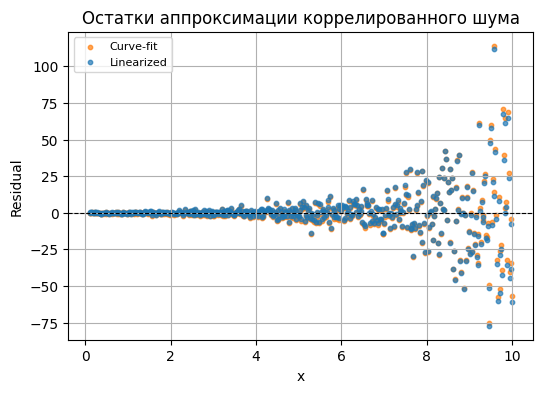

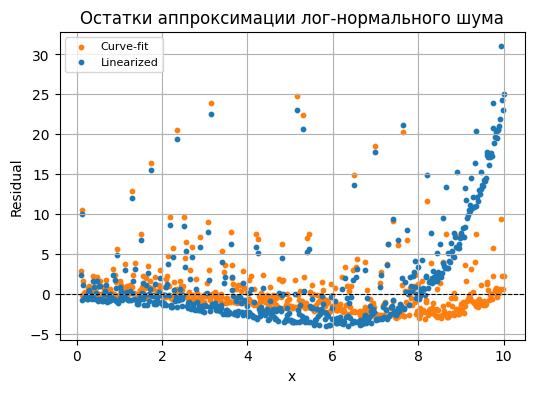

In [16]:
# Графики невязки на плоскости и невязка vs x
# Для корректности пересчитаем предсказания и невязки
y_pred_curve_normal = model_func(x, *popt_normal)
y_pred_lin_normal = Theta_normal[0]*np.exp(Theta_normal[1]*x)
resid_normal_curve = z_noized_normal - y_pred_curve_normal
resid_normal_lin = z_noized_normal - y_pred_lin_normal

y_pred_curve_lognormal = model_func(x, *popt_lognormal)
y_pred_lin_lognormal = Theta_lognormal[0]*np.exp(Theta_lognormal[1]*x)
resid_lognormal_curve = z_noized_lognormal - y_pred_curve_lognormal
resid_lognormal_lin = z_noized_lognormal - y_pred_lin_lognormal

# Невязка vs x (normal, curve-fit)
plt.figure(figsize=(6,4))
plt.scatter(x, resid_normal_curve, s=10, color='C1', label='Curve-fit',alpha = 0.7)
plt.scatter(x, resid_normal_lin, s=10, color='C0', label='Linearized',alpha = 0.7)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Остатки аппроксимации коррелированного шума')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(x, resid_lognormal_curve, s=10, color='C1', label='Curve-fit')
plt.scatter(x, resid_lognormal_lin, s=10, color='C0', label='Linearized')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Остатки аппроксимации лог-нормального шума')
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.show()
